<a href="https://colab.research.google.com/github/psvkaushik/Bikesafety/blob/main/BikeSafety_classification_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
training = pd.read_csv('/content/train_291021.csv')
validation = pd.read_csv('/content/Test_291021_ub.csv')

In [ ]:
training.head()

,Ax,Ay,Az,Gx,Gy,Gz,Lat,Long,Speed,Time,T,TIME IN GMT,TIME IN IST,Date,Label
0,-0.190000,-0.011748,1.027379,5.039709,-7.999126,0.796699,17.446962,78.349341,5.97,11522600,115226,11:52:26,17:22:26,291021,BUMP
1,0.035980,-0.004706,0.999412,4.171667,-7.491471,2.031275,17.446954,78.349344,3.76,11522700,115227,11:52:27,17:22:27,291021,BUMP
2,-0.217087,-0.008932,1.033301,4.606990,-8.224272,-1.540388,17.445938,78.350865,6.76,11525100,115251,11:52:51,17:22:51,291021,BUMP
3,-0.066796,-0.001942,0.995049,7.210583,-4.401553,-2.650291,17.445918,78.350898,5.51,11525200,115252,11:52:52,17:22:52,291021,BUMP
4,0.038911,0.038218,1.015248,-2.379307,-7.822871,4.207030,17.445814,78.350945,0.51,11552200,115522,11:55:22,17:25:22,291021,BUMP


In [ ]:
validation.tail()

,Ax,Ay,Az,Gx,Gy,Gz,Lat,Long,Speed,Time,T,TIME IN GMT,TIME IN IST,Date,Label
589,-0.018932,-0.012330,1.019223,4.137670,-7.427476,-0.182718,17.446629,78.349923,8.39,11523700,115237,11:52:37,17:22:37,291021,STRAIGHT
590,-0.039806,-0.001845,1.010971,3.299417,-6.553495,0.995340,17.446578,78.349993,8.64,11523800,115238,11:52:38,17:22:38,291021,STRAIGHT
591,-0.003398,-0.032330,1.013010,7.017282,-7.281068,0.283981,17.446528,78.350059,8.53,11523900,115239,11:52:39,17:22:39,291021,STRAIGHT
592,-0.015686,-0.029902,0.975098,3.259706,-6.838333,-0.220686,17.446480,78.350125,8.38,11524000,115240,11:52:40,17:22:40,291021,STRAIGHT
593,-0.039615,0.006154,1.038365,5.972885,-7.573077,-0.515481,17.446432,78.350198,8.50,11524100,115241,11:52:41,17:22:41,291021,STRAIGHT


In [ ]:
print('Train data: {} and Null Values : {}'.format(training.shape, training.isnull().values.any()))
print('Validation data: {} and Null Values : {}'.format(validation.shape, validation.isnull().values.any()))



Train data: (2359, 15) and Null Values : False
Validation data: (594, 15) and Null Values : False


In [ ]:
training = training.dropna()

In [ ]:
print('Train data: {} and Null Values : {}'.format(training.shape, training.isnull().values.any()))
print('Validation data: {} and Null Values : {}'.format(validation.shape, validation.isnull().values.any()))



Train data: (2359, 15) and Null Values : False
Validation data: (594, 15) and Null Values : False


In [ ]:
# Separating Dependent and Independent Variable
y= training['Label']
x= training.drop(['Label','TIME IN GMT','TIME IN IST'], axis=1)

# Get X and y for testing data
y_test = validation['Label']
X_test = validation.drop(columns = ['Label','TIME IN GMT','TIME IN IST'], axis=1)

In [ ]:
X_test

,Ax,Ay,Az,Gx,Gy,Gz,Lat,Long,Speed,Time,T,Date
0,-0.042549,-0.032745,1.029706,9.212647,-13.328039,23.468333,17.445803,78.350833,1.56,11394600,113946,291021
1,0.030097,-0.008447,0.990388,5.012524,-4.093010,3.899903,17.445819,78.350823,2.03,11394700,113947,291021
2,-0.135728,-0.004175,1.011359,4.069029,-7.175825,0.870097,17.446754,78.349811,6.12,11401100,114011,291021
3,-0.076040,-0.014950,1.038317,5.916139,-4.253069,0.003564,17.446772,78.349787,4.75,11401200,114012,291021
4,-0.109327,-0.008365,1.011346,4.758654,-6.622115,0.591058,17.447408,78.348328,5.63,11404300,114043,291021
...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.018932,-0.012330,1.019223,4.137670,-7.427476,-0.182718,17.446629,78.349923,8.39,11523700,115237,291021
590,-0.039806,-0.001845,1.010971,3.299417,-6.553495,0.995340,17.446578,78.349993,8.64,11523800,115238,291021
591,-0.003398,-0.032330,1.013010,7.017282,-7.281068,0.283981,17.446528,78.350059,8.53,11523900,115239,291021
592,-0.015686,-0.029902,0.975098,3.259706,-6.838333,-0.220686,17.446480,78.350125,8.38,11524000,115240,291021


In [ ]:
y

0           BUMP
1           BUMP
2           BUMP
3           BUMP
4           BUMP
          ...   
2354    STRAIGHT
2355    STRAIGHT
2356    STRAIGHT
2357    STRAIGHT
2358    STRAIGHT
Name: Label, Length: 2359, dtype: object

In [ ]:
count_of_each_activity_test = np.array(y_test.value_counts())


In [ ]:
count_of_each_activity_test

array([476,  46,  29,  22,  21])

In [ ]:
count_of_each_activity = np.array(y.value_counts())
activities = ['STRAIGHT','BUMP','RIGHT','STOP',
          'LEFT']

In [ ]:
y.unique

<bound method Series.unique of 0           BUMP
1           BUMP
2           BUMP
3           BUMP
4           BUMP
          ...   
2354    STRAIGHT
2355    STRAIGHT
2356    STRAIGHT
2357    STRAIGHT
2358    STRAIGHT
Name: Label, Length: 2359, dtype: object>

In [ ]:
activities

['STRAIGHT', 'BUMP', 'RIGHT', 'STOP', 'LEFT']

In [ ]:
count_of_each_activity

array([1903,  182,  113,   84,   77])

In [ ]:
activities

['STRAIGHT', 'BUMP', 'RIGHT', 'STOP', 'LEFT']

<BarContainer object of 5 artists>

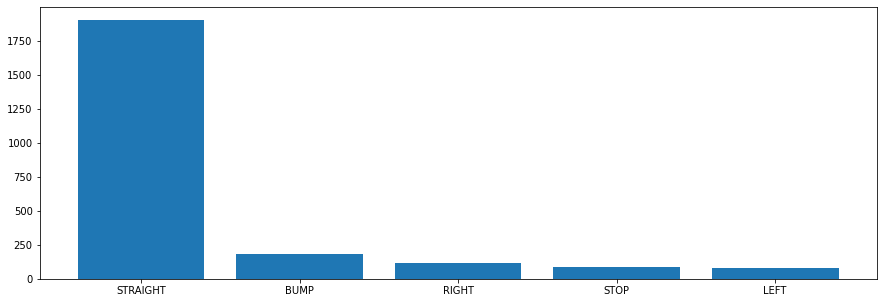

In [ ]:
plt.figure(figsize=[15,5])
plt.bar(activities,count_of_each_activity)

([<matplotlib.patches.Wedge at 0x7fd966ce0910>,
 [Text(-0.9033253828389125, 0.6276967840597341, 'STRAIGHT'),
  Text(0.6198536248453161, -0.9087251970569113, 'BUMP'),
  Text(0.9205244132558904, -0.6021916676606368, 'RIGHT'),
  Text(1.0452073810208087, -0.34284330336120344, 'STOP'),
  Text(1.0942215843976046, -0.11260161738801028, 'LEFT')],
 [Text(-0.49272293609395224, 0.34238006403258214, '80.67'),
  Text(0.3381019771883542, -0.4956682893037697, '7.72'),
  Text(0.5021042254123038, -0.3284681823603473, '4.79'),
  Text(0.570113116920441, -0.18700543819702006, '3.56'),
  Text(0.596848136944148, -0.06141906402982378, '3.26')])

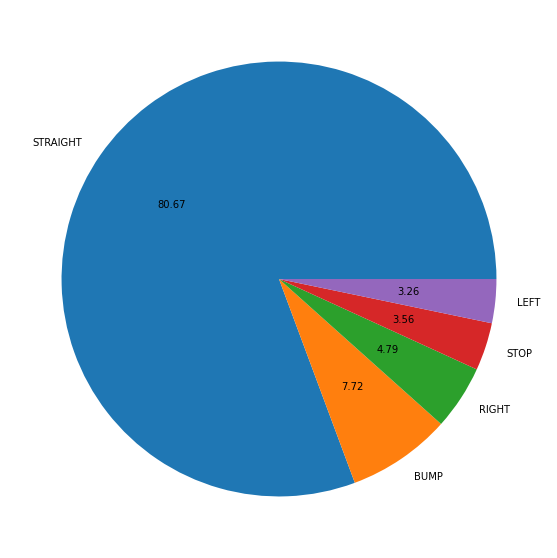

In [ ]:
plt.figure(figsize=[10,10])
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

In [ ]:
standing_activity= training.loc[training['Label']=='BUMP',:]


In [ ]:
#Reseting the index as we reset the index. This is necessary because when we selected the above rows, 
# the removed rows did get removed but the remaining rows’
# index did not change and they were no longer in a continuous order
standing_activity.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
accuracy_scores = np.zeros(5)


In [ ]:
accuracy_scores

array([0., 0., 0., 0., 0.])

In [ ]:
score_list = [] #to keep scores of algorithms


In [ ]:
x

,Ax,Ay,Az,Gx,Gy,Gz,Lat,Long,Speed,Time,T,Date
0,-0.190000,-0.011748,1.027379,5.039709,-7.999126,0.796699,17.446962,78.349341,5.97,11522600,115226,291021
1,0.035980,-0.004706,0.999412,4.171667,-7.491471,2.031275,17.446954,78.349344,3.76,11522700,115227,291021
2,-0.217087,-0.008932,1.033301,4.606990,-8.224272,-1.540388,17.445938,78.350865,6.76,11525100,115251,291021
3,-0.066796,-0.001942,0.995049,7.210583,-4.401553,-2.650291,17.445918,78.350898,5.51,11525200,115252,291021
4,0.038911,0.038218,1.015248,-2.379307,-7.822871,4.207030,17.445814,78.350945,0.51,11552200,115522,291021
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,-0.057573,-0.023981,1.015049,5.164078,-6.341845,0.549806,17.446139,78.350536,9.49,10043000,100430,271021
2355,-0.078641,-0.019320,1.024175,4.121456,-6.605340,-0.022913,17.446085,78.350591,8.98,10043100,100431,271021
2356,-0.136250,-0.019038,1.012500,4.148558,-6.205769,1.439519,17.446038,78.350650,8.56,10043200,100432,271021
2357,-0.188824,-0.026765,1.016863,5.990196,-5.995098,-0.305980,17.445999,78.350701,7.81,10043300,100433,271021


In [ ]:
# Support Vector Classifier
clf1 = SVC(gamma='auto').fit(x, y)
prediction_svc = clf1.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction_svc)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

Support Vector Classifier accuracy: 80.13468013468014%


In [ ]:
# Logistic Regression
clf2 = LogisticRegression(multi_class='auto').fit(x, y)
prediction_lr = clf2.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction_lr)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

Logistic Regression accuracy: 80.13468013468014%


In [ ]:
# K Nearest Neighbors
clf3 = KNeighborsClassifier().fit(x, y)
prediction_knn = clf3.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction_knn)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))


K Nearest Neighbors Classifier accuracy: 9.764309764309765%


In [ ]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 150)
knn.fit(x, y)
prediction_knn = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy_scores[1] = accuracy_score(y_test, prediction_knn )*100
print("Accuracy:",accuracy_score(y_test, prediction_knn)*100)


Accuracy: 83.83838383838383


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_svc)
print(cm)



[[  0   0   0   0  46]
 [  0   0   0   0  21]
 [  0   0   0   0  29]
 [  0   0   0   0  22]
 [  0   0   0   0 476]]


In [ ]:
# Random Forest
clf4 = RandomForestClassifier(n_estimators=25).fit(x, y)
prediction_rf = clf4.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction_rf)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Random Forest Classifier accuracy: 91.24579124579124%


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(x,y)
prediction_dtc = d.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction_dtc)*100
print('Decision Tree Classifier accuracy: {}%'.format(accuracy_scores[3]))

Decision Tree Classifier accuracy: 86.02693602693603%


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x,y)
prediction_nb = nb.predict(X_test)
print(accuracy_score(y_test,prediction_nb)*100)
accuracy_scores[4] = accuracy_score(y_test, prediction_nb)*100
print('Naive Bayes classifier accuracy: {}%'.format(accuracy_scores[4]))

83.83838383838383
Naive Bayes classifier accuracy: 83.83838383838383%


Text(0.5, 1.0, 'Accuracy of various algorithms')

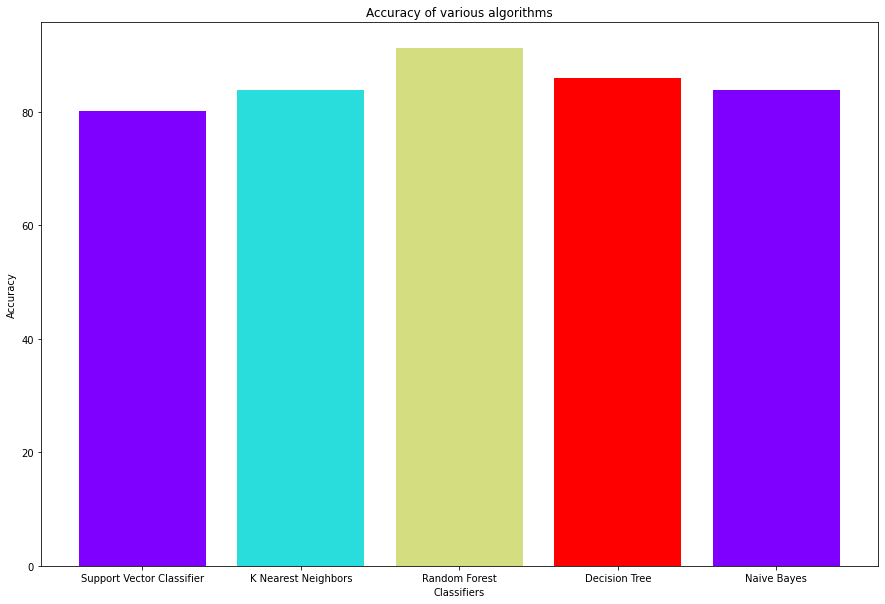

In [ ]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'K Nearest Neighbors', 'Random Forest', 'Decision Tree', 'Naive Bayes']
plt.figure(figsize=[15,10])
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')

In [ ]:
def plot_confusion_matrix(y_test, prediction, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, prediction)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
class_names=['BUMP','LEFT', 'RIGHT',  'STOP', 'STRAIGHT']

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx_svc=confusion_matrix(y_test,prediction_svc)
confusion_mtx_knn=confusion_matrix(y_test,prediction_knn)
confusion_mtx_rf=confusion_matrix(y_test,prediction_rf)
confusion_mtx_rf=confusion_matrix(y_test,prediction_dtc)
confusion_mtx_rf=confusion_matrix(y_test,prediction_nb)


Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


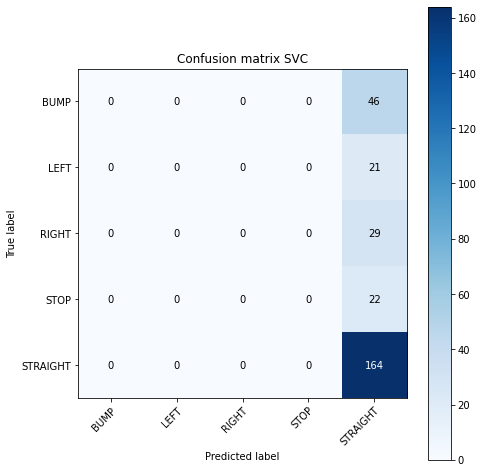

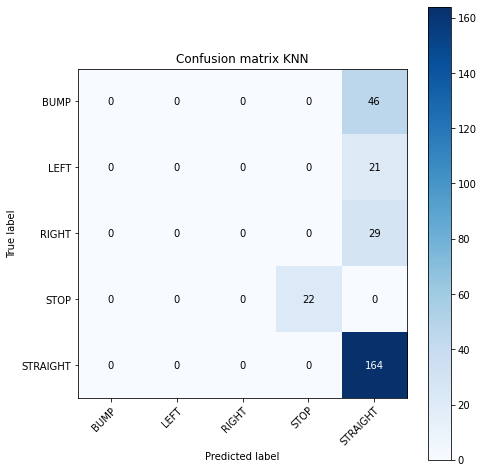

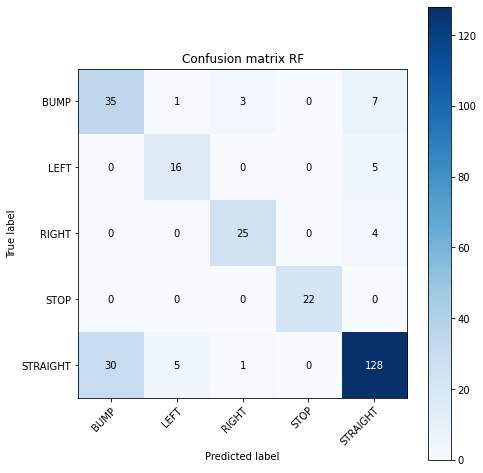

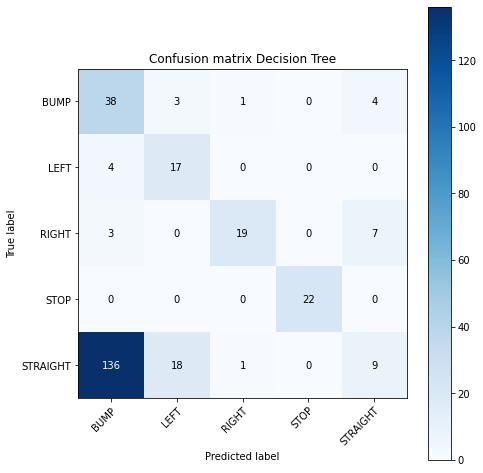

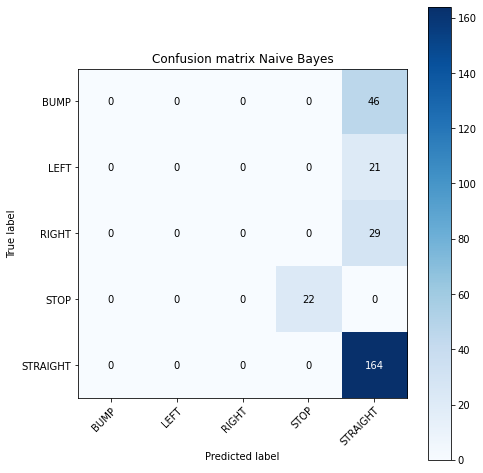

In [ ]:

plot_confusion_matrix(y_test ,prediction_svc, classes=class_names,
                      title='Confusion matrix SVC')
plot_confusion_matrix(y_test ,prediction_knn, classes=class_names,
                      title='Confusion matrix KNN')
plot_confusion_matrix(y_test ,prediction_rf, classes=class_names,
                      title='Confusion matrix RF')
plot_confusion_matrix(y_test ,prediction_dtc, classes=class_names,
                      title='Confusion matrix Decision Tree')
plot_confusion_matrix(y_test ,prediction_nb, classes=class_names,
                      title='Confusion matrix Naive Bayes')